In [1]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()
from sklearn import linear_model

Saving HR_comma_sep 1.csv to HR_comma_sep 1.csv


In [2]:
df = pd.read_csv("HR_comma_sep 1.csv")

In [11]:
df.head(50)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# which variables have direct and clear impact on employee retention

In [6]:
numeric_cols = df.select_dtypes(include='number')

numeric_cols.corr()['left'].sort_values(ascending=False)

,left
left,1.000000
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
promotion_last_5years,-0.061788
Work_accident,-0.154622
satisfaction_level,-0.388375


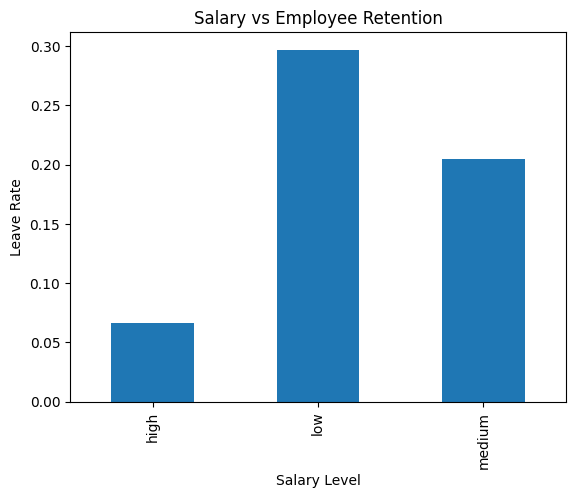

In [7]:
# bar charts showing impact of employee salaries on retention
salary_retention = df.groupby("salary")["left"].mean()

plt.figure()
salary_retention.plot(kind="bar")
plt.xlabel("Salary Level")
plt.ylabel("Leave Rate")
plt.title("Salary vs Employee Retention")
plt.show()

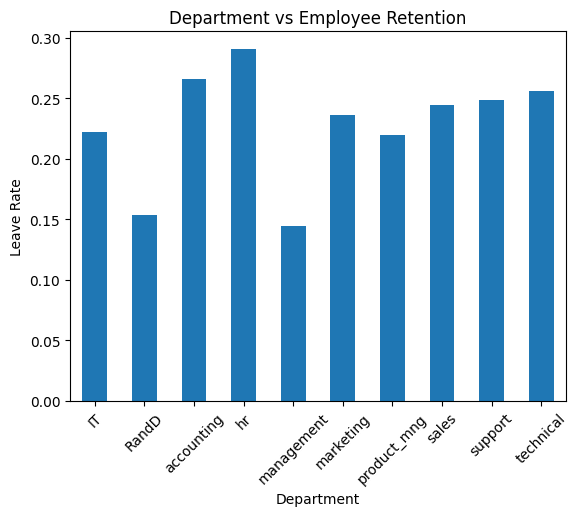

In [9]:
# bar charts showing corelation between department and employee retention
employee_retention  = df.groupby("Department")["left"].mean()

plt.figure()
employee_retention.plot(kind="bar")
plt.xlabel("Department")
plt.ylabel("Leave Rate")
plt.title("Department vs Employee Retention")
plt.xticks(rotation=45)
plt.show()

In [14]:
# build logistic regression model using variables that were narrowed down in step 1
from sklearn.model_selection import train_test_split


In [28]:
X = df[[
    "satisfaction_level",
    "time_spend_company",
    "average_montly_hours",
    "number_project"
]]

y = df["left"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7)

X_train, X_test, y_train, y_test

(       satisfaction_level  time_spend_company  average_montly_hours  \
 13936                0.16                   7                   286   
 6956                 0.79                   3                   168   
 11508                0.55                   8                   168   
 8105                 0.58                   3                   162   
 2263                 0.91                   2                   167   
 ...                   ...                 ...                   ...   
 11925                0.42                   2                   126   
 13467                0.67                   2                   198   
 1213                 0.38                   3                   134   
 652                  0.09                   4                   290   
 11038                0.61                   3                   224   
 
        number_project  
 13936               6  
 6956                4  
 11508               4  
 8105                4  
 2263    

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1])

In [32]:
model.score(X_test, y_test)

0.7626666666666667